In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import time
from datetime import date
import pandas as pd


In [187]:
# The input
datain = np.loadtxt('04a_input.txt',comments=None,dtype=str,usecols=(0,1,2,3))

year = np.empty((datain.shape[0])).astype(int)
month = np.empty_like(year)
day = np.empty_like(year)
hour = np.empty_like(year)
minute = np.empty_like(year)

for i in range(datain.shape[0]):
    
    for j in range(datain.shape[1]):
        datain[i,j] = datain[i,j].replace("b'",'').replace("'",'')
        
    year[i], month[i], day[i] = datain[i,0].replace('[','').split('-') # remove open bracket, split by '-'
    year[i] += 500
    hour[i], minute[i] = datain[i,1].replace(']','').split(':') # remove close bracket
    if datain[i,3][0] == '#':
        datain[i,3] = datain[i,3].replace('#','') # 
    else:
        datain[i,3] = ''
    


In [188]:
# put the dates in a dataframe
dfin = pd.DataFrame(np.squeeze(np.array((year,month,day,hour,minute))).T.tolist())
# name the columns according to time step
dfin = dfin.rename(columns={0: "year", 1: "month", 2: "day", 3: "hour", 4: "minute"})
# convert time steps into datetime
dfin = pd.to_datetime(dfin)
# rename time column
#dfin = dfin.rename(columns={0: "time"})

# add other information to the df
dftemp = pd.DataFrame(minute)
dfin = pd.concat([dfin, dftemp],axis=1)
dftemp = pd.DataFrame(datain[:,2])
dfin = pd.concat([dfin, dftemp],axis=1)
dftemp = pd.DataFrame(datain[:,3])
dfin = pd.concat([dfin, dftemp],axis=1)

# rename time column
dfin.columns = ['time','minute','info','gid']

# re-order by time and re-index
dfin = dfin.sort_values(by='time')
dfin = dfin.reset_index(drop=True)

#dfin[:][-5:]

In [193]:
# prepare for timecard
days = dfin.groupby('info').size()['Guard']

guards = dfin.gid.unique()
guards = np.append(guards[0],guards[2:])

# create the time card
tc = np.zeros((days,60+1))

# populate time card
day = 0
for index, row in dfin.iterrows():
    if row['info'] == 'Guard':
        tc[day,-1] = row['gid']
        # if dfin.iloc[index+1]['info'] == 'Guard': break...
        tc[day, dfin.iloc[index+1]['minute']:dfin.iloc[index+2]['minute']] = 1
        
        try:
            if dfin.iloc[index+3]['info'] == 'falls':
                tc[day, dfin.iloc[index+3]['minute']:dfin.iloc[index+4]['minute']] = 1
        except:
            pass
        
        day += 1
    
    
    

In [224]:
# create timecard dataframe
dftc = pd.DataFrame(tc)

# name guard number column
dftc = dftc.rename(columns={60: 'gid'})

# for each guard, print the total number of minutes slept
for guard in guards:
    print("Guard ",guard,"slept",
          np.sum(dftc.loc[dftc['gid'] == int(guard)].drop(['gid'],axis=1).values),
         "minutes")

Guard  2543 slept 150.0 minutes
Guard  3571 slept 262.0 minutes
Guard  1697 slept 333.0 minutes
Guard  2161 slept 459.0 minutes
Guard  613 slept 341.0 minutes
Guard  1619 slept 426.0 minutes
Guard  883 slept 238.0 minutes
Guard  2423 slept 251.0 minutes
Guard  1571 slept 492.0 minutes
Guard  2801 slept 394.0 minutes
Guard  953 slept 376.0 minutes
Guard  449 slept 450.0 minutes
Guard  919 slept 281.0 minutes
Guard  3299 slept 364.0 minutes
Guard  1307 slept 218.0 minutes
Guard  1607 slept 137.0 minutes
Guard  1091 slept 185.0 minutes
Guard  2467 slept 252.0 minutes
Guard  1597 slept 309.0 minutes
Guard  577 slept 80.0 minutes
Guard  283 slept 245.0 minutes
Guard  263 slept 10.0 minutes
Guard  157 slept 0.0 minutes


In [252]:
# Guard 1571 slept the most. Which minute did they sleep most often?
mins1571 = np.empty((60))
for i in range(len(mins1571)):
    mins1571[i] = dftc.loc[dftc['gid'] == int(1571)][i].sum()
    
print('Guard 1571 slept', mins1571[np.argmax(mins1571)],
      'at the', np.argmax(mins1571),' th minute.')
mins1571

Guard 1571 slept 12.0 at the 54  th minute.


array([  1.,   2.,   2.,   2.,   2.,   3.,   5.,   5.,   5.,   6.,   9.,
         9.,   9.,   9.,   9.,  10.,  10.,  10.,   9.,   9.,   9.,  10.,
        11.,  11.,  10.,  10.,   9.,  11.,  11.,   9.,   9.,   9.,   9.,
        10.,  10.,  10.,  10.,  10.,  10.,   7.,   7.,   7.,   7.,   8.,
         9.,  10.,  10.,  11.,  11.,  10.,  10.,   9.,  10.,  11.,  12.,
         9.,  11.,   6.,   3.,   0.])

In [253]:
54*1571

84834

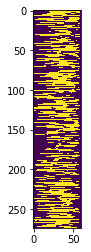

In [226]:
plt.imshow(tc[:,:-1])